## Was there any strategy for buying the 3 cryptocurrencies offered on Coinbase during 2017 (through November)?

Step 1:  import libraries

In [356]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from matplotlib.finance import candlestick_ohlc

import statistics
from sklearn import preprocessing

import plotly.plotly as py
import plotly.graph_objs as go
from datetime import datetime

Step 2:  Create dataframe for open, high, low, close, volume data for Bitcoin, Ethereum, and Litecoin.  Then normalize the data by:
- 1) Closing price between 0 and 1 over the period
- 2) Assume $1 worth of each crypto over the period


In [357]:
#create data frames for crypto prices
df_btc_cols = ['Date','BTC Close','BTC Volume']
df_btc = pd.read_csv('bitcoin_price.csv', usecols=['Date','Close','Volume'], parse_dates=['Date'])
df_btc.columns = df_btc_cols
df_btc_sorted = df_btc.sort_values(by='Date')

df_eth_cols = ['Date','ETH Close','ETH Volume']
df_eth = pd.read_csv('ethereum_price.csv', usecols=['Date','Close','Volume'], parse_dates=['Date'])
df_eth.columns = df_eth_cols 
df_eth_sorted = df_eth.sort_values(by='Date')

df_ltc_cols = ['Date','LTC Close','LTC Volume']
df_ltc = pd.read_csv('litecoin_price.csv', usecols=['Date','Close','Volume'], parse_dates=['Date'])
df_ltc.columns = df_ltc_cols 
df_ltc_sorted = df_ltc.sort_values(by='Date')

#merged table
df_btc_eth = pd.merge(df_btc_sorted, df_eth_sorted, on='Date', how='outer')
df_btc_eth_ltc_all = pd.merge(df_btc_eth, df_ltc_sorted, on='Date', how='outer')

mask = (df_btc_eth_ltc_all['Date'] >= '2017-01-01')
df_btc_eth_ltc = df_btc_eth_ltc_all[df_btc_eth_ltc_all.columns[:7]].loc[mask]

#add normalized price so that price is between 0 and 1
df_btc_eth_ltc['BTC Close normalized 1'] = (df_btc_eth_ltc['BTC Close'] -  df_btc_eth_ltc['BTC Close'].min())/(df_btc_eth_ltc['BTC Close'].max() - df_btc_eth_ltc['BTC Close'].min())
df_btc_eth_ltc['ETH Close normalized 1'] = (df_btc_eth_ltc['ETH Close'] -  df_btc_eth_ltc['ETH Close'].min())/(df_btc_eth_ltc['ETH Close'].max() - df_btc_eth_ltc['ETH Close'].min())
df_btc_eth_ltc['LTC Close normalized 1'] = (df_btc_eth_ltc['LTC Close'] -  df_btc_eth_ltc['LTC Close'].min())/(df_btc_eth_ltc['LTC Close'].max() - df_btc_eth_ltc['LTC Close'].min())

#normalization based on $1 investment in each
df_btc_eth_ltc['BTC Close normalized 2'] = df_btc_eth_ltc['BTC Close']/df_btc_eth_ltc['BTC Close'].iloc[0]
df_btc_eth_ltc['ETH Close normalized 2'] = df_btc_eth_ltc['ETH Close']/df_btc_eth_ltc['ETH Close'].iloc[0]
df_btc_eth_ltc['LTC Close normalized 2'] = df_btc_eth_ltc['LTC Close']/df_btc_eth_ltc['LTC Close'].iloc[0]

#final normalized table (all)
df = df_btc_eth_ltc[['Date','BTC Close normalized 1','ETH Close normalized 1','LTC Close normalized 1','BTC Close normalized 2','ETH Close normalized 2','LTC Close normalized 2','BTC Volume', 'ETH Volume','LTC Volume']]
df

Date  BTC Close normalized 1  ETH Close normalized 1  \
1344 2017-01-01                0.033270                0.000000   
1345 2017-01-02                0.036803                0.000534   
1346 2017-01-03                0.040135                0.003966   
1347 2017-01-04                0.056861                0.007831   
1348 2017-01-05                0.035540                0.005288   
1349 2017-01-06                0.018770                0.005288   
1350 2017-01-07                0.019734                0.004322   
1351 2017-01-08                0.020128                0.005390   
1352 2017-01-09                0.018865                0.005492   
1353 2017-01-10                0.019597                0.006051   
1354 2017-01-11                0.000000                0.003941   
1355 2017-01-12                0.004083                0.004297   
1356 2017-01-13                0.006972                0.004068   
1357 2017-01-14                0.006132                0.003763   
1358 2017-01-15                0.006643                0.004398   
1359 2017-01-16                0.008111                0.003737   
1360 2017-01-17                0.019636                0.005415   
1361 2017-01-18                0.016420                0.005237   
1362 2017-01-19                0.018298                0.005670   
1363 2017-01-20                0.017689                0.006178   
1364 2017-01-21                0.021725                0.006966   
1365 2017-01-22                0.022160                0.006432   
1366 2017-01-23                0.021607                0.006738   
1367 2017-01-24                0.017336                0.006254   
1368 2017-01-25                0.018671                0.006102   
1369 2017-01-26                0.021092                0.006153   
1370 2017-01-27                0.021417                0.006026   
1371 2017-01-28                0.021695                0.006076   
1372 2017-01-29                0.021380                0.005873   
1373 2017-01-30                0.021512                0.006102   
...         ...                     ...                     ...   
1625 2017-10-09                0.602484                0.735330   
1626 2017-10-10                0.603988                0.741635   
1627 2017-10-11                0.610699                0.750763   
1628 2017-10-12                0.704283                0.752492   
1629 2017-10-13                0.734496                0.840512   
1630 2017-10-14                0.762337                0.842723   
1631 2017-10-15                0.739169                0.835020   
1632 2017-10-16                0.746318                0.826833   
1633 2017-10-17                0.728206                0.785391   
1634 2017-10-18                0.725970                0.778374   
1635 2017-10-19                0.743744                0.762534   
1636 2017-10-20                0.789437                0.752161   
1637 2017-10-21                0.792476                0.742449   
1638 2017-10-22                0.788980                0.730398   
1639 2017-10-23                0.777199                0.708787   
1640 2017-10-24                0.716309                0.737720   
1641 2017-10-25                0.750121                0.736703   
1642 2017-10-26                0.773355                0.733143   
1643 2017-10-27                0.754661                0.735406   
1644 2017-10-28                0.750466                0.732559   
1645 2017-10-29                0.810916                0.754907   
1646 2017-10-30                0.807399                0.761670   
1647 2017-10-31                0.858362                0.756915   
1648 2017-11-01                0.903449                0.720838   
1649 2017-11-02                0.950388                0.710007   
1650 2017-11-03                0.969885                0.756483   
1651 2017-11-04                0.995858                0.743161   
1652 2017-11-05                1.000000                0.7

### Question 1:  When did each cryptocurrency "take off"?
Overall, there was no bad time to buy any of these 3 as \$1 investment in each was worth between \$7 and \$36 over the 11 month period thus far in 2017.  However, the winner was Ethereum.  The $1 investment in Ethereum began to diverge from the other 2 around March, 2017.  During that period, Bitcoin and Litecoin investments remained relatively flat until Litecoin separated from Bitcoin around April, 2017.Over the year, an investment in Bitcoin steadily rose and had less swings in value compared to the other two.

I've highlighted 3 periods of interest based on the apparent volatility, and rise in value over these periods.  I'll explore these further to see how they ranked overall on the entire year

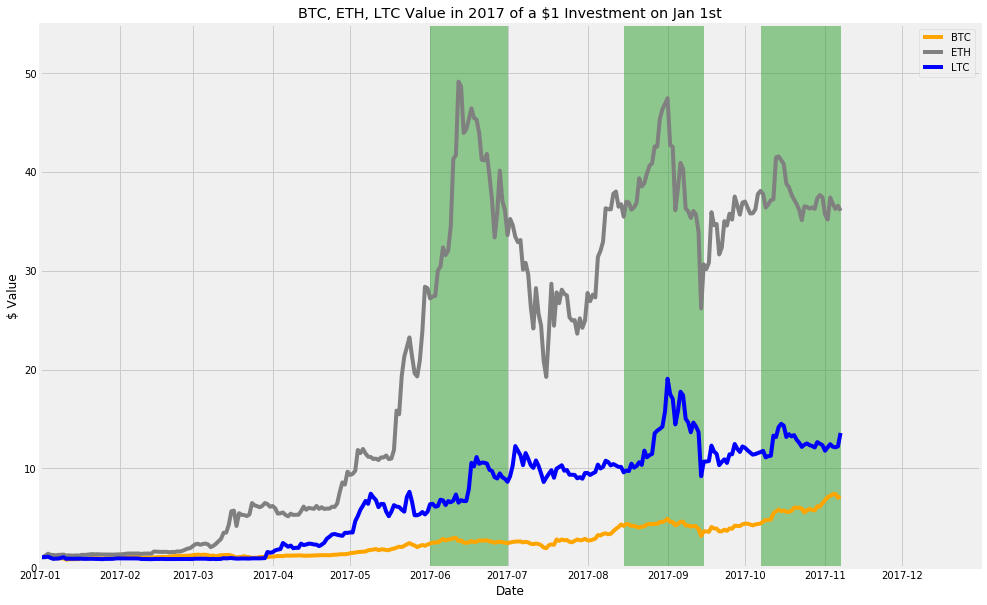

In [360]:
plt.figure(figsize=(15, 10))
plt.plot(df['Date'],df['BTC Close normalized 2'], color='orange', label='BTC')
plt.plot(df['Date'],df['ETH Close normalized 2'], color='grey', label='ETH')
plt.plot(df['Date'],df['LTC Close normalized 2'], color='blue', label='LTC')
plt.ylim([0.0, 55.0])
plt.xlabel('Date')
plt.ylabel('$ Value')
plt.title('BTC, ETH, LTC Value in 2017 of a $1 Investment on Jan 1st')
plt.legend(loc='best')
plt.xlim('2017-01-01', '2017-12-31')
plt.axvspan('2017-06-01', '2017-07-01', facecolor='#2ca02c', alpha=0.5)
plt.axvspan('2017-08-15', '2017-09-15', facecolor='#2ca02c', alpha=0.5)
plt.axvspan('2017-10-07', '2017-11-07', facecolor='#2ca02c', alpha=0.5)
plt.show()

### Question 2:  Does behavior in one cryptocurrency influence behavior in another?
Spikes in Bitcoin seem to be amplified by spikes in the other 2 currencies, with Ethereum getting the biggest push.  One theory around this is that the prices of the other 2 are cheaper, and thus psychologically more attractive for investors to purchase.  Thus a spike in Bitcoin may lead to investment in the other two.

Interestingly, the price of Bitcoin peaked towards the end of November 7th, while Ethereum and Litecoin did not expereince an expected pattern of rising price.  As of today, this would have been an excellent time to enter the market, as Ethereum rose ~140% and Litecoin rose by almost 500% in a month's time based on today's price on 12/17/2017.


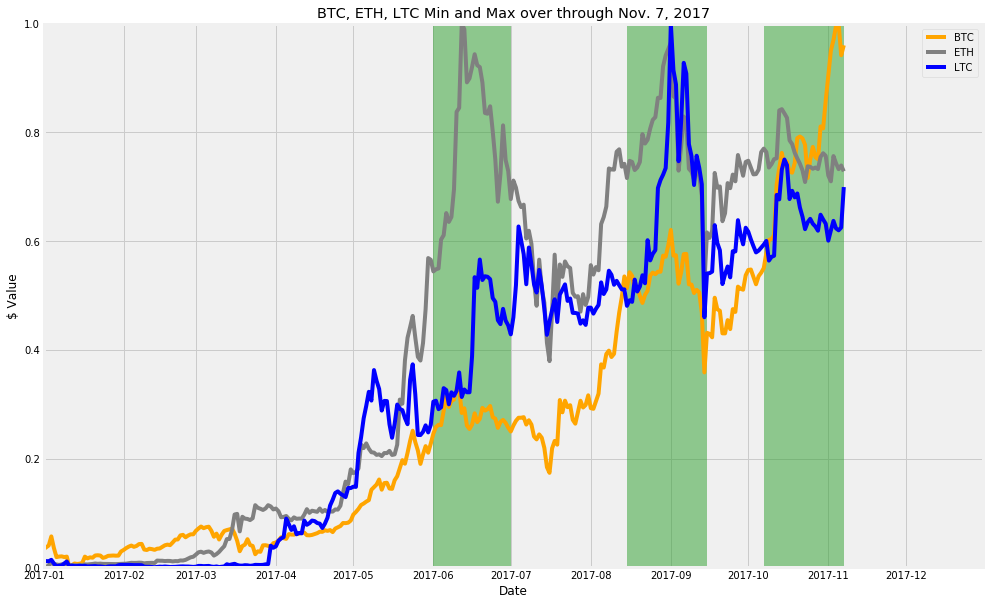

In [361]:
mask = (df_btc_eth_ltc_all['Date'] >= '2017-01-01') & (df_btc_eth_ltc_all['Date'] <= '2017-12-31')
df_btc_eth_ltc = df_btc_eth_ltc_all[df_btc_eth_ltc_all.columns[:7]].loc[mask]

#add normalized price so that price is between 0 and 1
df_btc_eth_ltc['BTC Close normalized 1'] = (df_btc_eth_ltc['BTC Close'] -  df_btc_eth_ltc['BTC Close'].min())/(df_btc_eth_ltc['BTC Close'].max() - df_btc_eth_ltc['BTC Close'].min())
df_btc_eth_ltc['ETH Close normalized 1'] = (df_btc_eth_ltc['ETH Close'] -  df_btc_eth_ltc['ETH Close'].min())/(df_btc_eth_ltc['ETH Close'].max() - df_btc_eth_ltc['ETH Close'].min())
df_btc_eth_ltc['LTC Close normalized 1'] = (df_btc_eth_ltc['LTC Close'] -  df_btc_eth_ltc['LTC Close'].min())/(df_btc_eth_ltc['LTC Close'].max() - df_btc_eth_ltc['LTC Close'].min())

#normalization based on $1 investment in each
df_btc_eth_ltc['BTC Close normalized 2'] = df_btc_eth_ltc['BTC Close']/df_btc_eth_ltc['BTC Close'].iloc[0]
df_btc_eth_ltc['ETH Close normalized 2'] = df_btc_eth_ltc['ETH Close']/df_btc_eth_ltc['ETH Close'].iloc[0]
df_btc_eth_ltc['LTC Close normalized 2'] = df_btc_eth_ltc['LTC Close']/df_btc_eth_ltc['LTC Close'].iloc[0]

#final normalized table (all)
df2 = df_btc_eth_ltc[['Date','BTC Close normalized 1','ETH Close normalized 1','LTC Close normalized 1','BTC Close normalized 2','ETH Close normalized 2','LTC Close normalized 2','BTC Volume', 'ETH Volume','LTC Volume']]

plt.figure(figsize=(15, 10))
plt.plot(df2['Date'],df2['BTC Close normalized 1'], color='orange', label='BTC')
plt.plot(df2['Date'],df2['ETH Close normalized 1'], color='grey', label='ETH')
plt.plot(df2['Date'],df2['LTC Close normalized 1'], color='blue', label='LTC')
plt.ylim([0.0, 1.0])
plt.xlabel('Date')
plt.ylabel('$ Value')
plt.title('BTC, ETH, LTC Min and Max over through Nov. 7, 2017')
plt.legend(loc='best')
plt.xlim('2017-01-01', '2017-12-31')
plt.axvspan('2017-06-01', '2017-07-01', facecolor='#2ca02c', alpha=0.5)
plt.axvspan('2017-08-15', '2017-09-15', facecolor='#2ca02c', alpha=0.5)
plt.axvspan('2017-10-07', '2017-11-07', facecolor='#2ca02c', alpha=0.5)
plt.show()

### Question 3:  Were there any other patterns during the first week of November that indicated it was a good time to buy?
At the start of November, the Bitcoin closing price rose steadily for 5 days straight.  During that same period, Ethereum and Litecoin exhibited no such trend.  

Given the sudden spike in Bitcoin, it's momentum into November, along with no such spike and momentum in the other 2, both Ethereum and Litecoin appeared to have been good purchases on November 5th, 2017.  This is due to the fact that during 2017, spikes in Bitcoin were typically amplified in both the other two, but this was not the case at this time...yet.


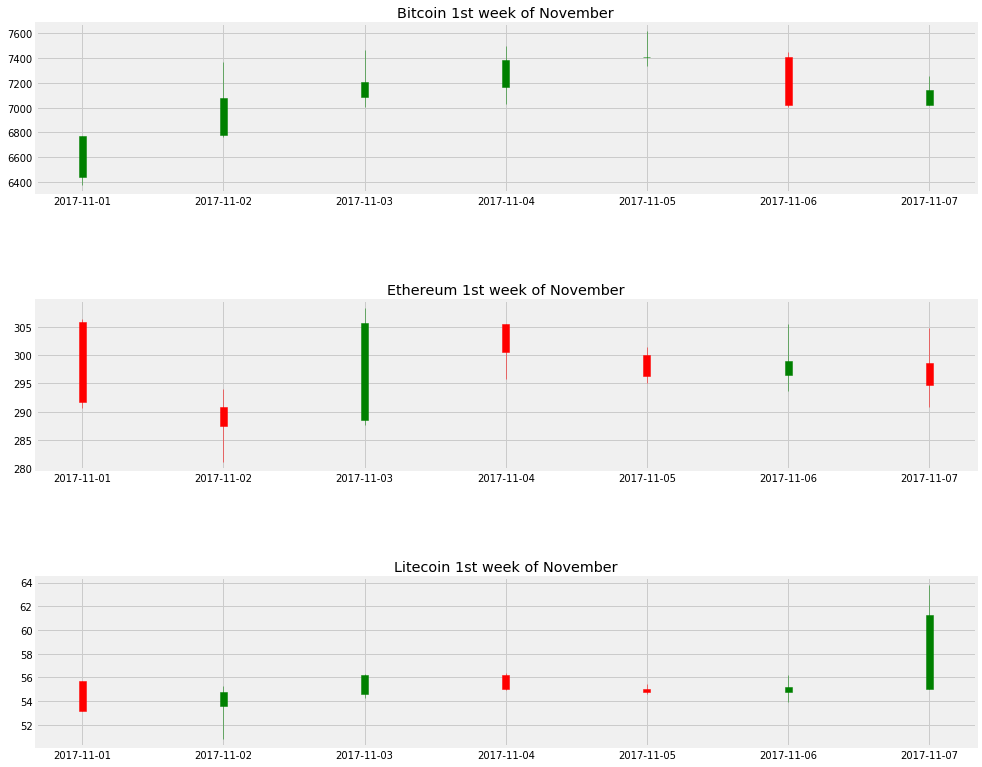

In [379]:
df3 = pd.read_csv('bitcoin_price.csv', usecols=['Date','Open','High','Low','Close','Volume'], parse_dates=['Date'])
df3['mdate'] = [mdates.date2num(d) for d in df3['Date']]
mask = (df3['Date'] >= '2017-11-01') & (df3['Date'] <= '2017-11-07')

df3_2 = df3[df3.columns[:7]].loc[mask]

x = 0
y = len(df3_2.index)
ohlc = []

while x < y:
    append_me = df3_2['mdate'].iloc[x], df3_2['Open'].iloc[x], df3_2['High'].iloc[x], df3_2['Low'].iloc[x], df3_2['Close'].iloc[x], df3_2['Volume'].iloc[x]
    ohlc.append(append_me)
    x+=1


df5 = pd.read_csv('litecoin_price.csv', usecols=['Date','Open','High','Low','Close','Volume'], parse_dates=['Date'])
df5['mdate'] = [mdates.date2num(d) for d in df5['Date']]
mask = (df5['Date'] >= '2017-11-01') & (df5['Date'] <= '2017-11-07')

df5_2 = df5[df5.columns[:7]].loc[mask]

x = 0
y = len(df5_2.index)
ohlc3 = []

while x < y:
    append_me = df5_2['mdate'].iloc[x], df5_2['Open'].iloc[x], df5_2['High'].iloc[x], df5_2['Low'].iloc[x], df5_2['Close'].iloc[x], df5_2['Volume'].iloc[x]
    ohlc3.append(append_me)
    x+=1

    
    
    

plt.figure(figsize=(15, 15))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1 = plt.subplot2grid((9,1), (0,0), rowspan=2, colspan=1)
ax2 = plt.subplot2grid((9,1), (3,0), rowspan=2, colspan=1)
ax3 = plt.subplot2grid((9,1), (6,0), rowspan=2, colspan=1)
candlestick_ohlc(ax1, ohlc, width=0.05, colorup='g', colordown='r')
candlestick_ohlc(ax2, ohlc2, width=0.05, colorup='g', colordown='r')
candlestick_ohlc(ax3, ohlc3, width=0.05, colorup='g', colordown='r')
#ax2.bar(df3_2['mdate'], df3_2['Volume'])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#plt.xticks(rotation=60)
ax1.title.set_text('Bitcoin 1st week of November')
ax2.title.set_text('Ethereum 1st week of November')
ax3.title.set_text('Litecoin 1st week of November')
plt.show()
#ohlc